### ACTIVIDAD 3:

Integrantes:
Helen Labarca/
#Sebastian Rebolledo/
#Sebastian Massoud/
#Carlos Gomez

# 3.1 Transformacion e imputacion de datos

Bibliotecas



In [77]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
import joblib 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score



Cargar la base de datos

In [ ]:
def cargar_base_datos(directorio, separador, muestra=False, columnas=None, archivo='Gaia_NaN.csv', nrows=None):
    import pandas as pd
    import os

    ruta_archivo = os.path.join(directorio, archivo)

    if muestra and columnas is None:
        columnas = pd.read_csv(ruta_archivo, nrows=0, sep=separador).columns.tolist()

    if columnas is not None and not isinstance(columnas, list):
        raise TypeError("El argumento 'columnas' debe ser una lista")

    if muestra:
        if nrows is None:
            nrows = 10000
        df = pd.read_csv(ruta_archivo, usecols=columnas, nrows=nrows, sep=separador)
    else:
        df = pd.read_csv(ruta_archivo, usecols=columnas, sep=separador)

    return df

# cargar_base_datos(r'C:\Users\Sebastian\Downloads', muestra=True)
#data = cargar_base_datos('C:\\Users\\Sebastian\\Downloads\\miniproyecto-1', ';', muestra=True, nrows=10000)
data = pd.read_csv('Gaia_NaN.csv', sep=';', nrows=10000)
#os.chdir("C:\CARLOS GOMEZ\DIPLOMADO PYTHON UC\CURSO 4 CIENCIAS DE DATOS\CLASE 4\MINIPROYECTO ACT 3")
print(os.getcwd())

C:\CARLOS GOMEZ\DIPLOMADO PYTHON UC\CURSO 4 CIENCIAS DE DATOS\CLASE 4\MINIPROYECTO ACT 3


In [16]:
data.head()

,ID,Class,N,Amplitude,Rcs,Meanvariance,Autocor_length,SlottedA_length,Con,SmallKurtosis,...,Freq1_harmonics_rel_phase_2,Freq1_harmonics_rel_phase_3,Freq2_harmonics_rel_phase_0,Freq2_harmonics_rel_phase_1,Freq2_harmonics_rel_phase_2,Freq2_harmonics_rel_phase_3,Freq3_harmonics_rel_phase_0,Freq3_harmonics_rel_phase_1,Freq3_harmonics_rel_phase_2,Freq3_harmonics_rel_phase_3
0,2128919424960482176,MIRA_SR,25.0,1.416432,0.949482,3.0,0.000000,5.442293,0.243054,0.462373,...,268.331543,0.025528,0.304804,0.310355,1.784879,0.304804,0.011895,19.899170,-1.266215,0.931676
1,5610570552491688320,RRAB,34.0,0.443386,1.000000,1.0,0.000000,12042.752633,0.162446,0.231268,...,0.508910,0.012390,0.309458,0.519645,0.397205,0.258203,-0.962335,0.147949,-0.183573,0.284637
2,5610983311725261312,MIRA_SR,35.0,0.170099,0.875986,4.0,0.030303,137.020266,0.033964,0.208724,...,8.742769,0.040022,0.342646,0.700200,0.119849,0.368936,0.472161,0.147949,0.064528,0.089020
3,5611101307371763328,MIRA_SR,34.0,1.350858,0.999869,4.0,0.000000,23.583559,0.259476,0.593270,...,379.949707,0.000843,0.349687,0.285682,1.867060,0.349687,-0.047072,23.597900,-1.454570,0.926506
4,4654706786001108096,MIRA_SR,28.0,0.248472,0.999947,3.0,0.000000,125.486491,0.202240,0.448444,...,318.427795,0.022169,0.247451,0.578087,0.273482,0.247451,0.594605,0.147949,-0.689124,0.153349


 Se Genera un diagnostico de estadıstica descriptiva

In [ ]:
import pandas as pd

# Función para diagnóstico estadístico
def diagnostico_estadistico(df, columnas=None, media=True, desviacion=True, maximo=True, minimo=True, valores_perdidos=True):
    if columnas is None:
        columnas = df.columns.tolist()

    columnas_numericas = df[columnas].select_dtypes(include=['number']).columns.tolist()
    diagnostico = {}

    if media:
        diagnostico['Media'] = df[columnas_numericas].mean()
    if desviacion:
        diagnostico['Desviación Estándar'] = df[columnas_numericas].std()
    if maximo:
        diagnostico['Máximo'] = df[columnas_numericas].max()
    if minimo:
        diagnostico['Mínimo'] = df[columnas_numericas].min()
    if valores_perdidos:
        diagnostico['Valores Perdidos'] = df[columnas].isnull().sum()

    df_diagnostico = pd.DataFrame(diagnostico)
    return df_diagnostico

data = pd.read_csv('Gaia_NaN.csv', sep=';')

#Aplicar la función
df_diagnostico = diagnostico_estadistico(data)
print(df_diagnostico.head())


                    Media  Desviación Estándar    Máximo    Mínimo  \
Amplitude        0.356176             0.271657  3.452071  0.050792   
AndersonDarling  0.015220             1.244922  3.139112 -3.134095   
Autocor_length   0.001212             0.007242  0.125000  0.000000   
Class                 NaN                  NaN       NaN       NaN   
Con              0.206498             0.112087  0.912962  0.001687   

                 Valores Perdidos  
Amplitude                     169  
AndersonDarling               178  
Autocor_length                171  
Class                         205  
Con                           174  


Impute los datos perdidos con el m´etodo de su eleccion.

In [3]:
from sklearn.impute import SimpleImputer

def imputar_datos(df, columnas, estrategias):
    df_imputado = df.copy()

    for columna, estrategia in zip(columnas, estrategias):
        if estrategia == 'media':
            imputer = SimpleImputer(strategy='mean')
        elif estrategia == 'mediana':
            imputer = SimpleImputer(strategy='median')
        elif estrategia == 'moda':
            imputer = SimpleImputer(strategy='most_frequent')
        else:
            raise ValueError(f"Estrategia '{estrategia}' no soportada.")

        df_imputado[[columna]] = imputer.fit_transform(df_imputado[[columna]])

    return df_imputado

df_imputado = imputar_datos(data, ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Class', 'Con'], ['mediana', 'mediana', 'mediana', 'moda', 'mediana'])
df_imputado.head()

# Estas líneas son para nuevamente verificar si los valores vacíos verdaderamente se limpiaron o no
# df_imputado_diagnostico = diagnostico_estadistico(df_imputado)
# df_imputado_diagnostico.head()

,ID,Class,N,Amplitude,Rcs,Meanvariance,Autocor_length,SlottedA_length,Con,SmallKurtosis,...,Freq1_harmonics_rel_phase_2,Freq1_harmonics_rel_phase_3,Freq2_harmonics_rel_phase_0,Freq2_harmonics_rel_phase_1,Freq2_harmonics_rel_phase_2,Freq2_harmonics_rel_phase_3,Freq3_harmonics_rel_phase_0,Freq3_harmonics_rel_phase_1,Freq3_harmonics_rel_phase_2,Freq3_harmonics_rel_phase_3
0,2128919424960482176,MIRA_SR,25.0,1.416432,0.949482,3.0,0.000000,5.442293,0.243054,0.462373,...,268.331543,0.025528,0.304804,0.310355,1.784879,0.304804,0.011895,19.899170,-1.266215,0.931676
1,5610570552491688320,RRAB,34.0,0.443386,1.000000,1.0,0.000000,12042.752633,0.162446,0.231268,...,0.508910,0.012390,0.309458,0.519645,0.397205,0.258203,-0.962335,0.147949,-0.183573,0.284637
2,5610983311725261312,MIRA_SR,35.0,0.170099,0.875986,4.0,0.030303,137.020266,0.033964,0.208724,...,8.742769,0.040022,0.342646,0.700200,0.119849,0.368936,0.472161,0.147949,0.064528,0.089020
3,5611101307371763328,MIRA_SR,34.0,1.350858,0.999869,4.0,0.000000,23.583559,0.259476,0.593270,...,379.949707,0.000843,0.349687,0.285682,1.867060,0.349687,-0.047072,23.597900,-1.454570,0.926506
4,4654706786001108096,MIRA_SR,28.0,0.248472,0.999947,3.0,0.000000,125.486491,0.202240,0.448444,...,318.427795,0.022169,0.247451,0.578087,0.273482,0.247451,0.594605,0.147949,-0.689124,0.153349


Genera 2 graficos diferentes

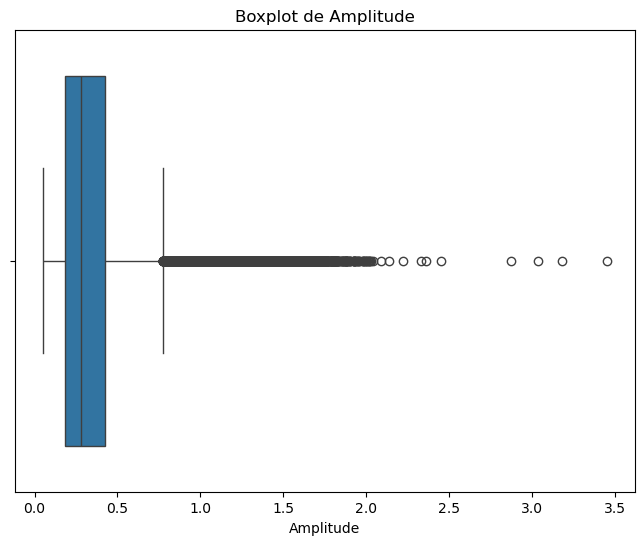

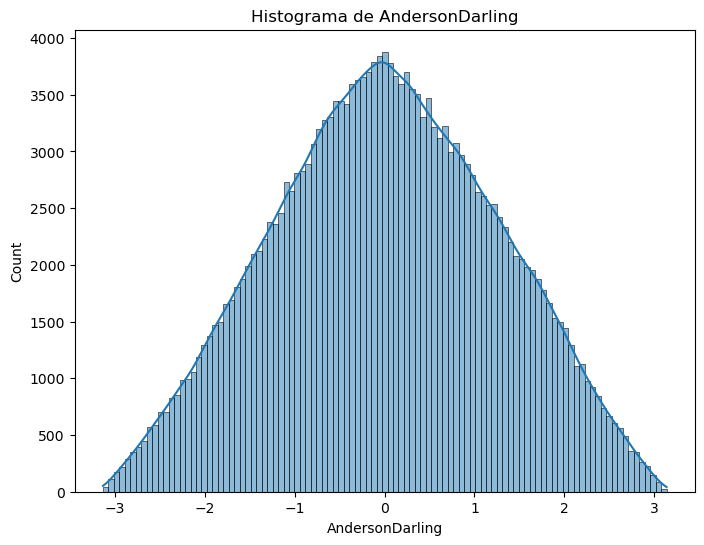

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para Amplitude
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputado['Amplitude'])
plt.title('Boxplot de Amplitude')
plt.show()

# Histograma para AndersonDarling
plt.figure(figsize=(8, 6))
sns.histplot(df_imputado['AndersonDarling'], kde=True)
plt.title('Histograma de AndersonDarling')
plt.show()

Se crea una funcion que permita hacer scatter plots y/o box plots para dos descriptores datos

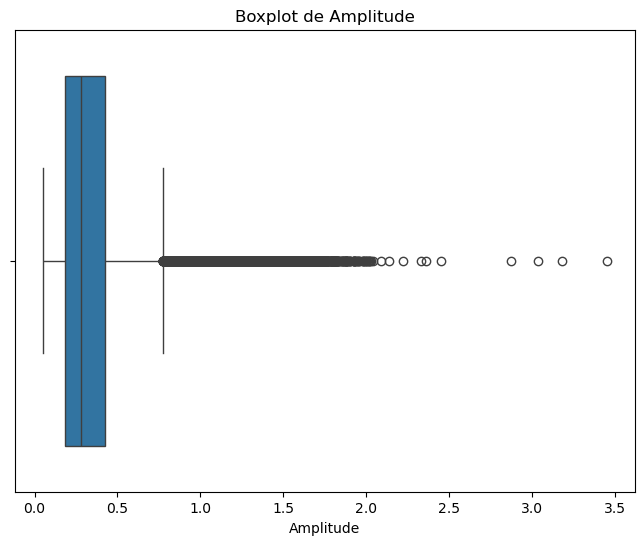

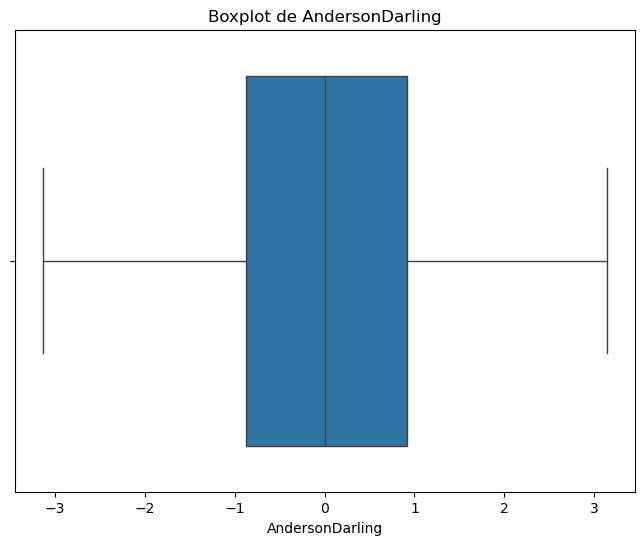

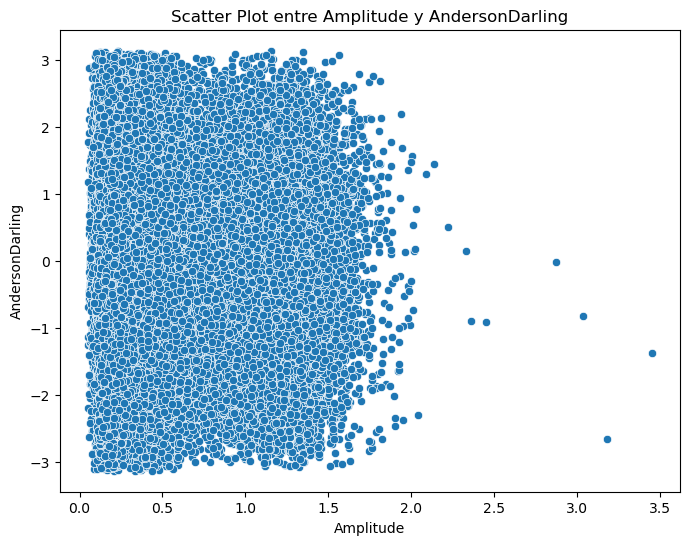

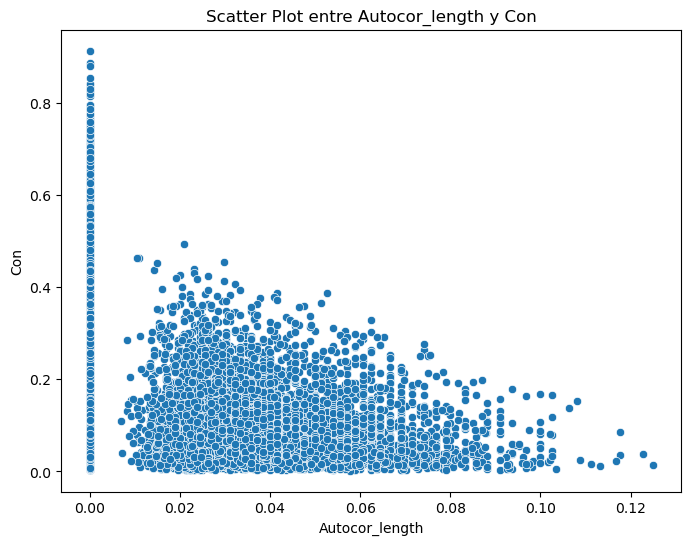

In [5]:
def crear_grafico(df, variable1, variable2=None, tipo_grafico='scatter', guardar=False, nombre_archivo='grafico.png'):
    plt.figure(figsize=(8, 6))
    
    if tipo_grafico == 'scatter' and variable2:
        sns.scatterplot(x=df[variable1], y=df[variable2])
        plt.title(f'Scatter Plot entre {variable1} y {variable2}')
    
    elif tipo_grafico == 'boxplot' and not variable2:
        sns.boxplot(x=df[variable1])
        plt.title(f'Boxplot de {variable1}')
    
    if guardar:
        plt.savefig(nombre_archivo)
    else:
        plt.show()

# Usando la función para 5 descriptores
crear_grafico(df_imputado, 'Amplitude', tipo_grafico='boxplot', guardar=False)
crear_grafico(df_imputado, 'AndersonDarling', tipo_grafico='boxplot', guardar=False)
crear_grafico(df_imputado, 'Amplitude', 'AndersonDarling', tipo_grafico='scatter', guardar=False)
crear_grafico(df_imputado, 'Autocor_length', 'Con', tipo_grafico='scatter', guardar=False)

Aplique normalizacion z o escalamiento a los datos

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def normalizar_datos(df, columnas, estrategia='z'):
    if estrategia == 'z':
        scaler = StandardScaler()
    elif estrategia == 'minmax':
        scaler = MinMaxScaler()
    
    df[columnas] = scaler.fit_transform(df[columnas])
    return df

# Ejemplo de uso:
columnas_a_normalizar = ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Con']
df_normalizado = normalizar_datos(df_imputado, columnas_a_normalizar, estrategia='z')
print(df_normalizado.head())

                    ID    Class     N  Amplitude       Rcs  Meanvariance  \
0  2128919424960482176  MIRA_SR  25.0   3.904683  0.949482           3.0   
1  5610570552491688320     RRAB  34.0   0.321397  1.000000           1.0   
2  5610983311725261312  MIRA_SR  35.0  -0.684997  0.875986           4.0   
3  5611101307371763328  MIRA_SR  34.0   3.663203  0.999869           4.0   
4  4654706786001108096  MIRA_SR  28.0  -0.396386  0.999947           3.0   

   Autocor_length  SlottedA_length       Con  SmallKurtosis  ...  \
0       -0.167317         5.442293  0.326384       0.462373  ...   
1       -0.167317     12042.752633 -0.393074       0.231268  ...   
2        4.018837       137.020266 -1.539836       0.208724  ...   
3       -0.167317        23.583559  0.472961       0.593270  ...   
4       -0.167317       125.486491 -0.037892       0.448444  ...   

   Freq1_harmonics_rel_phase_2  Freq1_harmonics_rel_phase_3  \
0                   268.331543                     0.025528   
1       

Genere sets de entrenamiento y testeo, con separacion estratificada

In [7]:
from sklearn.model_selection import train_test_split

def dividir_datos(df, columna_objetivo, test_size=0.2, random_state=42):
    X = df.drop(columns=[columna_objetivo])
    y = df[columna_objetivo]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    
    return X_train, X_test, y_train, y_test

# Ejemplo de uso:
X_train, X_test, y_train, y_test = dividir_datos(df_normalizado, columna_objetivo='Class', test_size=0.2)
print(f"Tamaño del set de entrenamiento: {X_train.shape}")
print(f"Tamaño del set de prueba: {X_test.shape}")

Tamaño del set de entrenamiento: (160535, 55)
Tamaño del set de prueba: (40134, 55)


Se Consolida todas las funciones en una clase.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import os

class Preprocesamiento:
    def __init__(self, directorio, archivo='Gaia_NaN.csv', separador=';', muestra=False, columnas=None, nrows=None):
        self.directorio = directorio
        self.archivo = archivo
        self.separador = separador
        self.muestra = muestra
        self.columnas = columnas
        self.nrows = nrows
        self.df = self.cargar_base_datos()

    def cargar_base_datos(self):
        ruta_archivo = os.path.join(self.directorio, self.archivo)

        if self.muestra and self.columnas is None:
            self.columnas = pd.read_csv(ruta_archivo, nrows=0, sep=self.separador).columns.tolist()

        if self.columnas is not None and not isinstance(self.columnas, list):
            raise TypeError("El argumento 'columnas' debe ser una lista")

        if self.muestra:
            if self.nrows is None:
                self.nrows = 10000
            df = pd.read_csv(ruta_archivo, usecols=self.columnas, nrows=self.nrows, sep=self.separador)
        else:
            df = pd.read_csv(ruta_archivo, usecols=self.columnas, sep=self.separador)

        return df

    def diagnostico_estadistico(self, columnas=None, media=True, desviacion=True, maximo=True, minimo=True, valores_perdidos=True):
        if columnas is None:
            columnas = self.df.columns.tolist()

        columnas_numericas = self.df[columnas].select_dtypes(include=['number']).columns.tolist()

        diagnostico = {}

        if media:
            diagnostico['Media'] = self.df[columnas_numericas].mean()

        if desviacion:
            diagnostico['Desviación Estándar'] = self.df[columnas_numericas].std()

        if maximo:
            diagnostico['Máximo'] = self.df[columnas_numericas].max()

        if minimo:
            diagnostico['Mínimo'] = self.df[columnas_numericas].min()

        if valores_perdidos:
            diagnostico['Valores Perdidos'] = self.df[columnas].isnull().sum()

        df_diagnostico = pd.DataFrame(diagnostico)

        return df_diagnostico

    def imputar_datos(self, columnas, estrategias):
        df_imputado = self.df.copy()

        for columna, estrategia in zip(columnas, estrategias):
            if estrategia == 'media':
                imputer = SimpleImputer(strategy='mean')
            elif estrategia == 'mediana':
                imputer = SimpleImputer(strategy='median')
            elif estrategia == 'moda':
                imputer = SimpleImputer(strategy='most_frequent')
            else:
                raise ValueError(f"Estrategia '{estrategia}' no soportada.")

            df_imputado[[columna]] = imputer.fit_transform(df_imputado[[columna]])

        self.df = df_imputado
        return self.df

    def crear_grafico(self, variable1, variable2=None, tipo_grafico='scatter', guardar=False, nombre_archivo='grafico.png'):
        plt.figure(figsize=(8, 6))

        if tipo_grafico == 'scatter' and variable2:
            sns.scatterplot(x=self.df[variable1], y=self.df[variable2])
            plt.title(f'Scatter Plot entre {variable1} y {variable2}')

        elif tipo_grafico == 'boxplot' and not variable2:
            sns.boxplot(x=self.df[variable1])
            plt.title(f'Boxplot de {variable1}')

        if guardar:
            plt.savefig(nombre_archivo)
        else:
            plt.show()

    def normalizar_datos(self, columnas, estrategia='z'):
        if estrategia == 'z':
            scaler = StandardScaler()
        elif estrategia == 'minmax':
            scaler = MinMaxScaler()

        self.df[columnas] = scaler.fit_transform(self.df[columnas])
        return self.df

    def dividir_datos(self, columna_objetivo, test_size=0.2, random_state=42):
        X = self.df.drop(columns=[columna_objetivo])
        y = self.df[columna_objetivo]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

        return X_train, X_test, y_train, y_test

    def ejecutar_procesamiento(self, columnas_imputacion, estrategias_imputacion, columnas_normalizacion, estrategia_normalizacion, columna_objetivo, test_size=0.2):
        print("Realizando diagnóstico estadístico...")
        diagnostico = self.diagnostico_estadistico()
        print(diagnostico)

        print("Imputando datos...")
        self.imputar_datos(columnas_imputacion, estrategias_imputacion)

        print("Normalizando datos...")
        self.normalizar_datos(columnas_normalizacion, estrategia_normalizacion)

        print("Dividiendo los datos en conjunto de entrenamiento y prueba...")
        X_train, X_test, y_train, y_test = self.dividir_datos(columna_objetivo, test_size)

        return X_train, X_test, y_train, y_test

En esta ejecucion hay que tener cuidado con la carga, es decir identificar la ruta donde se encuentra el archivo a procesar

In [17]:
preproceso = Preprocesamiento(directorio='C:\CARLOS GOMEZ\DIPLOMADO PYTHON UC\CURSO 4 CIENCIAS DE DATOS\CLASE 4\MINIPROYECTO ACT 3', muestra=True, archivo='Gaia_NaN.csv', separador=';')

X_train, X_test, y_train, y_test = preproceso.ejecutar_procesamiento(
    columnas_imputacion=['Amplitude', 'AndersonDarling', 'Autocor_length', 'Class', 'Con'],
    estrategias_imputacion=['mediana', 'mediana', 'mediana', 'moda', 'mediana'],
    columnas_normalizacion=['Amplitude', 'AndersonDarling', 'Autocor_length', 'Con'],
    estrategia_normalizacion='z',
    columna_objetivo='Class',
    test_size=0.2
)

# Ver resultados
print(X_train.shape, X_test.shape)

Realizando diagnóstico estadístico...
                                        Media  Desviación Estándar  \
Amplitude                        8.214750e-01         4.407683e-01   
AndersonDarling                 -2.491844e-02         1.245174e+00   
Autocor_length                   1.489017e-03         7.734911e-03   
Class                                     NaN                  NaN   
Con                              2.185424e-01         1.306285e-01   
Eta_e                            1.910856e-01         2.375057e-01   
FluxPercentileRatioMid20         2.614774e-01         2.390484e-01   
FluxPercentileRatioMid35         0.000000e+00         0.000000e+00   
FluxPercentileRatioMid50         1.997215e-02         1.327554e+00   
FluxPercentileRatioMid65         1.424684e-02         1.289336e+00   
FluxPercentileRatioMid80         2.859009e-02         1.263995e+00   
Freq1_harmonics_amplitude_0      1.435234e-01         2.867872e-01   
Freq1_harmonics_amplitude_1      0.000000e+00       

### 3.2 Entrenamiento de modelos



Ajuste los clasificadores naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import os
import joblib

def clasificador(tipo, directorio_modelo, X_train, y_train):
    # Crear modelo
    if tipo == 'naive_bayes':
        modelo = GaussianNB()
    elif tipo == 'logistic_regression':
        modelo = LogisticRegression(random_state=42)
    else:
        raise ValueError("El tipo de clasificador debe ser 'naive_bayes' o 'logistic_regression'.")

    # Validar datos
    if X_train is None or y_train is None:
        raise ValueError("Los datos de entrenamiento no pueden ser None.")
    if len(X_train) != len(y_train):
        raise ValueError("La cantidad de filas en X_train y y_train no coincide.")

    # Entrenar modelo
    modelo.fit(X_train, y_train)
    print(f"Modelo {tipo} ajustado correctamente.")

    # Crear directorio si no existe
    os.makedirs(directorio_modelo, exist_ok=True)

    # Guardar modelo
    ruta_modelo = os.path.join(directorio_modelo, f"{tipo}_model.pkl")
    joblib.dump(modelo, ruta_modelo)
    print(f"Modelo guardado en: {ruta_modelo}")


Aplicar la funcion

In [69]:
directorio_modelos = "modelos_guardados"

#guardar el modelo Naive Bayes
clasificador('naive_bayes', directorio_modelos, X_train, y_train)

#guardar el modelo Regresión Logística
clasificador('logistic_regression', directorio_modelos, X_train, y_train)


Modelo naive_bayes ajustado correctamente.
Modelo guardado en: modelos_guardados\naive_bayes_model.pkl
Modelo logistic_regression ajustado correctamente.
Modelo guardado en: modelos_guardados\logistic_regression_model.pkl


Cree una funcion que tenga por nombre evaluar rendimiento

In [ ]:

def evaluar_rendimiento(direccion_modelo, X_eval, y_eval, tipo_analisis='matriz_confusion'):
   
   
    try:
        modelo = joblib.load(direccion_modelo)
        print(f"Modelo cargado desde: {direccion_modelo}")
    except FileNotFoundError:
        print(f"Error: No se encontró el modelo en la dirección especificada: {direccion_modelo}")
        return

    # Manejar valores NaN
    if np.any(np.isnan(X_eval)):
        print("Advertencia: Se encontraron valores NaN en los datos de evaluación. Imputando valores...")
        imputer = SimpleImputer(strategy='mean')
        X_eval = imputer.fit_transform(X_eval)

    #predicción
    try:
        y_pred = modelo.predict(X_eval)
    except ValueError as e:
        print(f"Error durante la predicción: {e}")
        return

    
    if tipo_analisis == 'matriz_confusion':
        matriz = confusion_matrix(y_eval, y_pred)
        print("\nMatriz de Confusión:")
        print(matriz)

    elif tipo_analisis == 'metricas':
        accuracy = accuracy_score(y_eval, y_pred)
        recall = recall_score(y_eval, y_pred, average='weighted')
        precision = precision_score(y_eval, y_pred, average='weighted')
        f1 = f1_score(y_eval, y_pred, average='weighted')

        print("\nMétricas de Evaluación:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"F1-Score: {f1:.2f}")

    else:
        print("Error: El tipo de análisis debe ser 'matriz_confusion' o 'metricas'.")




Aplicar la Funcion

In [94]:
#modelos guardados
ruta_modelo_naive_bayes = "modelos_guardados/naive_bayes_model.pkl"
ruta_modelo_logistic_regression = "modelos_guardados/logistic_regression_model.pkl"

# Evaluar modelo Naive Bayes
print("Evaluando modelo Naive Bayes:")
evaluar_rendimiento(ruta_modelo_naive_bayes, X_test, y_test, tipo_analisis='matriz_confusion')
evaluar_rendimiento(ruta_modelo_naive_bayes, X_test, y_test, tipo_analisis='metricas')

# Evaluar el modelo de Regresión
print("\nEvaluando modelo Regresión Logística:")
evaluar_rendimiento(ruta_modelo_logistic_regression, X_test, y_test, tipo_analisis='matriz_confusion')
evaluar_rendimiento(ruta_modelo_logistic_regression, X_test, y_test, tipo_analisis='metricas')

Evaluando modelo Naive Bayes:
Modelo cargado desde: modelos_guardados/naive_bayes_model.pkl
Advertencia: Se encontraron valores NaN en los datos de evaluación. Imputando valores...
Error durante la predicción: X has 55 features, but GaussianNB is expecting 5 features as input.
Modelo cargado desde: modelos_guardados/naive_bayes_model.pkl
Advertencia: Se encontraron valores NaN en los datos de evaluación. Imputando valores...
Error durante la predicción: X has 55 features, but GaussianNB is expecting 5 features as input.

Evaluando modelo Regresión Logística:
Modelo cargado desde: modelos_guardados/logistic_regression_model.pkl
Advertencia: Se encontraron valores NaN en los datos de evaluación. Imputando valores...
Error durante la predicción: X has 55 features, but LogisticRegression is expecting 5 features as input.
Modelo cargado desde: modelos_guardados/logistic_regression_model.pkl
Advertencia: Se encontraron valores NaN en los datos de evaluación. Imputando valores...
Error durant

Use estas funciones para probar distintos modelos

In [ ]:
def explorar_modelos(X_train, y_train, X_test, y_test):
   
    #Diccionario
    resultados = {}
    
    #Modelo Naive Bayes
    print("Naive Bayes...")
    priors_list = [None, [0.5, 0.5], [0.7, 0.3]]
    for priors in priors_list:
        modelo_nb = GaussianNB(priors=priors)
        modelo_nb.fit(X_train, y_train)
        y_pred = modelo_nb.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        resultados[f'Naive Bayes - Priors {priors}'] = f1
        print(f"Priors: {priors} | F1-score: {f1}")

    #Modelo Regresión
    print("\nRegresión Logística...")
    penalty_list = ['l2', 'none']
    C_list = [0.01, 1, 10]
    for penalty in penalty_list:
        for C in C_list:
            modelo_lr = LogisticRegression(penalty=penalty, C=C, max_iter=1000, solver='lbfgs')
            modelo_lr.fit(X_train, y_train)
            y_pred = modelo_lr.predict(X_test)
            f1 = f1_score(y_test, y_pred, average='weighted')
            resultados[f'Logistic Regression - Penalty {penalty}, C {C}'] = f1
            print(f"Penalty: {penalty}, C: {C} | F1-score: {f1}")

    #Seleccionar
    mejor_modelo_nombre = max(resultados, key=resultados.get)
    print("\nMejor modelo:", mejor_modelo_nombre)
    print("F1-score del mejor modelo:", resultados[mejor_modelo_nombre])

    return mejor_modelo_nombre, resultados[mejor_modelo_nombre]


np.random.seed(42)
X = np.random.rand(100, 5)
y = np.random.choice([0, 1], size=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Aplicar la Funcion

In [117]:
print("\nmodelos en progreso...\n")
mejor_modelo, mejor_f1 = explorar_modelos(X_train, y_train, X_test, y_test)

# Resultado final
print("\nEl mejor modelo es:", mejor_modelo)
print("Con un F1 score de:", mejor_f1)


modelos en progreso...

Naive Bayes...
Priors: None | F1-score: 0.3333333333333333
Priors: [0.5, 0.5] | F1-score: 0.4000000000000001
Priors: [0.7, 0.3] | F1-score: 0.3333333333333333

Regresión Logística...
Penalty: l2, C: 0.01 | F1-score: 0.3333333333333333
Penalty: l2, C: 1 | F1-score: 0.3333333333333333
Penalty: l2, C: 10 | F1-score: 0.3333333333333333
Penalty: none, C: 0.01 | F1-score: 0.3333333333333333
Penalty: none, C: 1 | F1-score: 0.3333333333333333
Penalty: none, C: 10 | F1-score: 0.3333333333333333

Mejor modelo: Naive Bayes - Priors [0.5, 0.5]
F1-score del mejor modelo: 0.4000000000000001

El mejor modelo es: Naive Bayes - Priors [0.5, 0.5]
Con un F1 score de: 0.4000000000000001


### 3.3 Modelos basados en arboles
Aca no estuve en la clase cuando se explico el 3.3, me exprese lo que pienso ????

a) Explorar la documentación
Se visualizan arboles que vendrian siendo modelos supervisados, los arboles representan deciciones y cada rama representa sus categorias

b) Ajuste un arbol de decision a los datos usados
Programar utilizando tipo de modelo de arbol en donde se utiliza sklearn.tree.DecisionTreeClassifie
entrenar los datos X_train, y_train
y comparar los rendimientos Naive Bayes y Regresión Logística

c)Repita a y b pero con el clasificador random forest
